**Цель проекта:**

Разработать и обучить модель машинного обучения, которая анализирует данные пользователей из приложения OKCupid для выявления закономерностей и предсказания определенных аспектов, например, успешности взаимного интереса, наиболее подходящих пар или факторов, влияющих на вероятность успешного знакомства.

**Основные задачи:**

1. **Исследование и обработка датасета OKCupid**: очистка данных, обработка пропущенных значений, извлечение признаков.
2. **Формулирование аналитического вопроса**: например, "Как демографические данные влияют на совместимость?".
3. **Построение и оценка моделей машинного обучения**: выбор подходящих алгоритмов, обучение моделей, оценка качества.
4. **Создание презентации результатов**: визуализация данных, интерпретация результатов, формулирование выводов.

---

**Имеющиеся данные:**

- **Датасет OKCupid**: включает ответы пользователей на вопросы, демографические данные, привычки.
- **Информация о пользователях**: возраст, пол, интересы, географическое расположение и другие атрибуты.

---


### Загрузка и ознакомление с данными

#### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Загрузка датасета

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ Date-A-Scientist/profiles.csv')
df.head(3)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available


#### Краткое описание столбцов

**Категориальные данные:**

- **age**: Возраст пользователя.
- **body_type**: Тип телосложения (например, "average", "thin", "athletic").
- **diet**: Пищевые предпочтения (например, "strictly vegan", "anything").
- **drinks**: Частота употребления алкоголя (например, "socially", "often", "never").
- **drugs**: Употребление наркотиков (например, "never", "sometimes").
- **education**: Уровень образования (например, "graduated from masters program").
- **ethnicity**: Этническая принадлежность.
- **height**: Рост в дюймах.
- **income**: Годовой доход в долларах США.
- **job**: Профессия.
- **offspring**: Наличие детей.
- **orientation**: Ориентация ("straight", "bisexual", "gay").
- **pets**: Отношение к домашним животным.
- **religion**: Религиозные убеждения.
- **sex**: Пол ("m" или "f").
- **sign**: Знак зодиака.
- **smokes**: Курение.
- **speaks**: Языки.
- **status**: Семейное положение.

**Текстовые данные:**

- **essay0**: Саммари о себе.
- **essay1**: О текущей деятельности.
- **essay2**: Сильные стороны.
- **essay3**: Первое впечатление.
- **essay4**: Любимые книги, фильмы и т.д.
- **essay5**: Шесть вещей, без которых не обойтись.
- **essay6**: О чем часто думает.
- **essay7**: Типичный пятничный вечер.
- **essay8**: Самое личное признание.
- **essay9**: Почему стоит написать.

#### Предварительная обработка данных

Удалим ненужные текстовые столбцы и записи с неизвестным доходом.

In [3]:
# Удаление текстовых столбцов
text_columns = [f'essay{i}' for i in range(10)]
df = df.drop(columns=text_columns)

# Удаление записей с неизвестным доходом
df = df[df['income'] != -1]

# Определение числовых и категориальных столбцов
numerical_cols = ['age', 'height', 'income']
categorical_columns = ['body_type', 'diet', 'drinks', 'drugs', 'education', 'orientation', 'sex', 'status']

df = df[numerical_cols + categorical_columns]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11504 entries, 1 to 59943
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          11504 non-null  int64  
 1   height       11504 non-null  float64
 2   income       11504 non-null  int64  
 3   body_type    10938 non-null  object 
 4   diet         7465 non-null   object 
 5   drinks       11277 non-null  object 
 6   drugs        9692 non-null   object 
 7   education    10783 non-null  object 
 8   orientation  11504 non-null  object 
 9   sex          11504 non-null  object 
 10  status       11504 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 1.1+ MB


#### Статистические характеристики числовых столбцов

In [4]:
df.describe()

,age,height,income
count,11504.000000,11504.000000,11504.000000
mean,32.467837,69.103442,104394.993046
std,9.746844,4.003725,201433.528307
min,18.000000,1.000000,20000.000000
25%,25.000000,67.000000,20000.000000
50%,30.000000,69.000000,50000.000000
75%,37.000000,72.000000,100000.000000
max,69.000000,95.000000,1000000.000000


#### Визуализация распределения числовых признаков

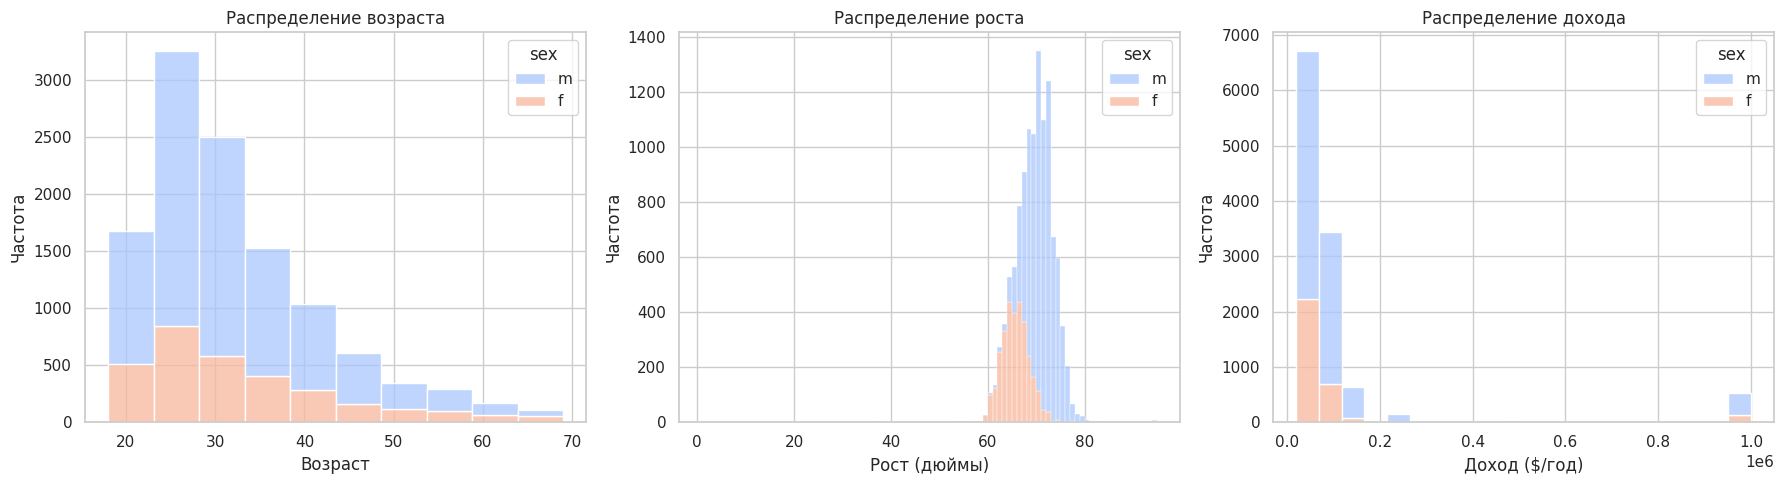

In [5]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Распределение возраста
sns.histplot(data=df, x="age", hue="sex", binwidth=5, multiple="stack", ax=axes[0], palette='coolwarm')
axes[0].set_title('Распределение возраста')
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Частота')

# Распределение роста
sns.histplot(data=df, x="height", hue="sex", binwidth=1, multiple="stack", ax=axes[1], palette='coolwarm')
axes[1].set_title('Распределение роста')
axes[1].set_xlabel('Рост (дюймы)')
axes[1].set_ylabel('Частота')

# Распределение дохода
sns.histplot(data=df, x="income", hue="sex", binwidth=50000, multiple="stack", ax=axes[2], palette='coolwarm')
axes[2].set_title('Распределение дохода')
axes[2].set_xlabel('Доход ($/год)')
axes[2].set_ylabel('Частота')

plt.tight_layout()
plt.show()

#### Анализ категориальных признаков

In [6]:
for col in categorical_columns:
    print(f"Столбец: {col}")
    print(df[col].value_counts())
    print('-'*30)

Столбец: body_type
body_type
average           2953
athletic          2484
fit               2217
thin               748
a little extra     744
curvy              688
skinny             389
full figured       264
overweight         168
jacked             145
used up            101
rather not say      37
Name: count, dtype: int64
------------------------------
Столбец: diet
diet
mostly anything        3673
anything               1175
strictly anything      1030
mostly vegetarian       660
mostly other            237
strictly vegetarian     174
strictly other          138
mostly vegan             79
vegetarian               77
other                    64
strictly vegan           62
vegan                    29
mostly kosher            29
mostly halal             18
strictly kosher           9
strictly halal            6
halal                     4
kosher                    1
Name: count, dtype: int64
------------------------------
Столбец: drinks
drinks
socially       7731
rarely         

#### Визуализация распределения категориальных признаков

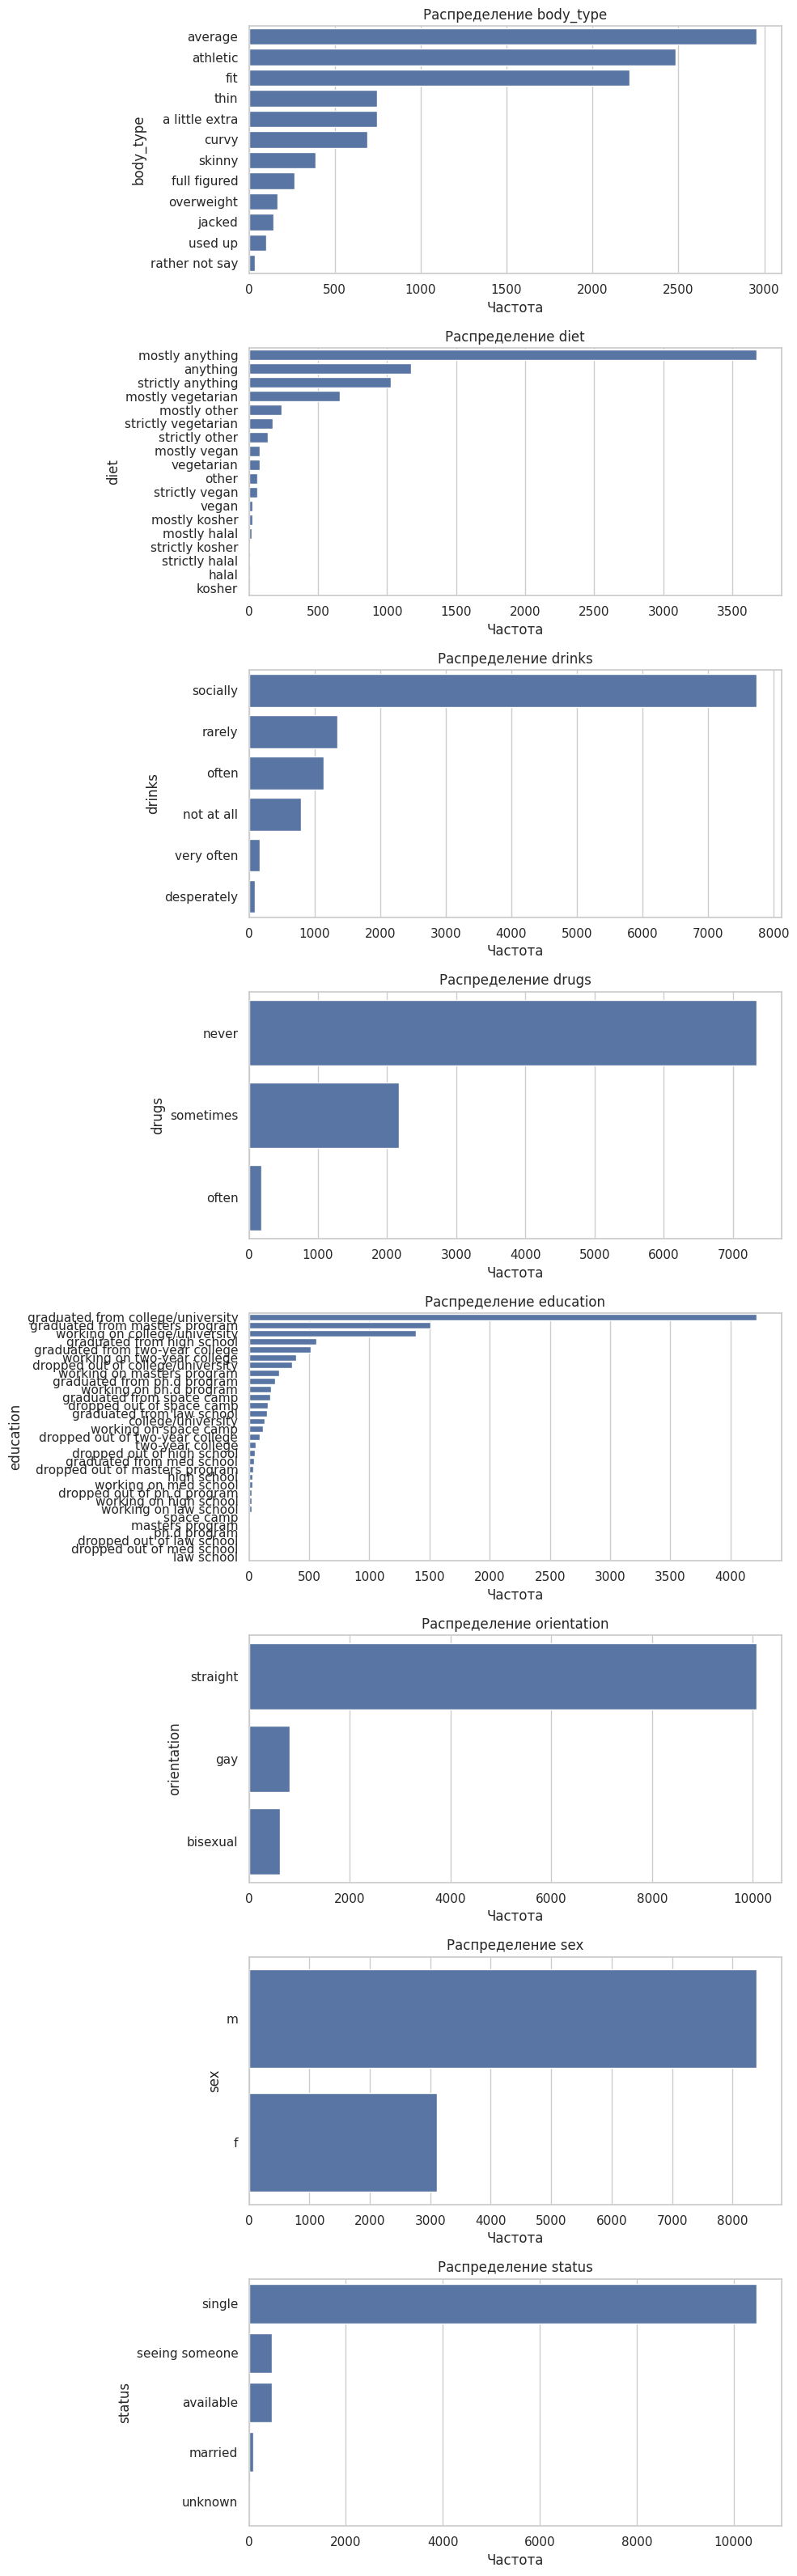

In [7]:
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(10, len(categorical_columns)*4))

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel('Частота')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

### Определение задачи машинного обучения

**Задача**: Построить модель для предсказания дохода пользователей на основе их характеристик.

- **Тип задачи**: Регрессия.
- **Целевая переменная**: `income`.

### Выбор целевой переменной

Нормализуем целевую переменную с помощью `MinMaxScaler`.

In [8]:
from sklearn.preprocessing import MinMaxScaler
import pickle

# Нормализация целевой переменной
income_scaler = MinMaxScaler()
df['Target'] = income_scaler.fit_transform(df[['income']])

# Сохранение scaler
with open('income_scaler.pkl', 'wb') as f:
    pickle.dump(income_scaler, f)

print("Обученный scaler для income сохранён как 'income_scaler.pkl'.")

Обученный scaler для income сохранён как 'income_scaler.pkl'.


#### Визуализация распределения целевой переменной

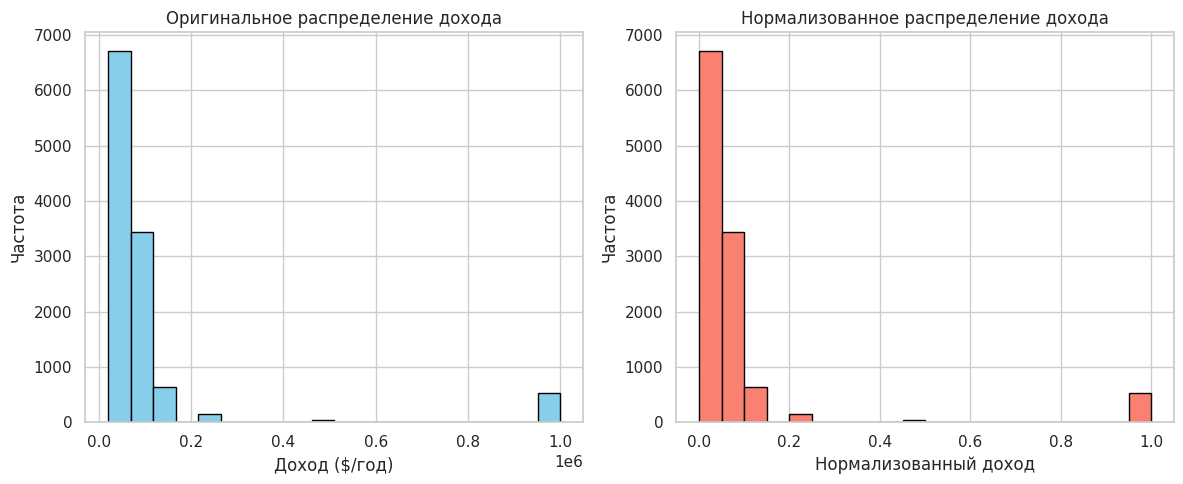

In [9]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['income'], bins=20, color='skyblue', edgecolor='black')
plt.title('Оригинальное распределение дохода')
plt.xlabel('Доход ($/год)')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(df['Target'], bins=20, color='salmon', edgecolor='black')
plt.title('Нормализованное распределение дохода')
plt.xlabel('Нормализованный доход')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

### Выбор признаков

In [10]:
numerical_cols = ['age', 'height']
categorical_columns = ['body_type', 'drinks', 'education', 'orientation', 'sex', 'status']

columns = numerical_cols + categorical_columns

df[columns+['Target']].isnull().sum()

,0
age,0
height,0
body_type,566
drinks,227
education,721
orientation,0
sex,0
status,0
Target,0


Удалим записи с пропущенными значениями и преобразуем данные.

In [11]:
df.shape

(11504, 12)

In [12]:
df_clean = df[columns+['Target']].dropna()
df_clean.shape

(10098, 9)

#### Обработка признаков

1. **Нормализация числовых признаков**

In [13]:
from sklearn.preprocessing import StandardScaler

# Преобразуем числовые столбцы в float64
df_clean[numerical_cols] = df_clean[numerical_cols].astype(float)

scaler = StandardScaler()
df_clean.loc[:, numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])

print(df_clean[numerical_cols].describe())

                age        height
count  1.009800e+04  1.009800e+04
mean   6.930923e-17  1.536765e-15
std    1.000050e+00  1.000050e+00
min   -1.465340e+00 -1.534894e+01
25%   -7.550871e-01 -5.321248e-01
50%   -2.477636e-01 -2.119999e-02
75%    4.624893e-01  7.451872e-01
max    3.709360e+00  6.620822e+00


2. **Кодирование категориальных признаков**

In [14]:
df_clean = pd.get_dummies(df_clean, columns=categorical_columns, drop_first=True)
df_clean.shape

(10098, 56)

3. **Разделение данных**

In [15]:
from sklearn.model_selection import train_test_split

# Разделение данных
X = df_clean.drop('Target', axis=1)
y = df_clean['Target']

# Преобразование булевских столбцов в числовые
X = X.astype(float)

print(f"""
The size of X data: {X.shape}
The size of y data: {y.shape}
""")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"""
The size of Trained data: {X_train.shape}
The size of Test data: {X_test.shape}
""")


The size of X data: (10098, 55)
The size of y data: (10098,)


The size of Trained data: (8078, 55)
The size of Test data: (2020, 55)



4. **Преобразование в тензоры**

In [16]:
import torch

# Преобразование в тензоры PyTorch
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

### Построение модели

#### Определение модели

In [17]:
import torch.nn as nn
import torch.optim as optim

class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.fc(x)

input_dim = X_train_tensor.shape[1]
model = RegressionModel(input_dim)

#### Обучение модели

In [18]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

losses = []
num_epochs = 1000

for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    loss = criterion(outputs.squeeze(), y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f"Эпоха [{epoch+1}/{num_epochs}], Потеря: {loss.item():.4f}")

Эпоха [100/1000], Потеря: 0.0295
Эпоха [200/1000], Потеря: 0.0244
Эпоха [300/1000], Потеря: 0.0217
Эпоха [400/1000], Потеря: 0.0194
Эпоха [500/1000], Потеря: 0.0176
Эпоха [600/1000], Потеря: 0.0176
Эпоха [700/1000], Потеря: 0.0164
Эпоха [800/1000], Потеря: 0.0157
Эпоха [900/1000], Потеря: 0.0152
Эпоха [1000/1000], Потеря: 0.0154


### Оценка модели

#### Метрики качества

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model(X_test_tensor).detach().squeeze().numpy()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 0.0979
MSE: 0.0582
R²: -0.3086


#### График функции потерь

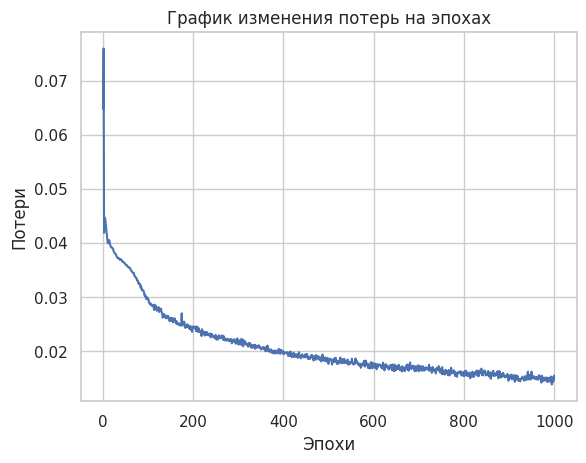

In [20]:
import matplotlib.pyplot as plt

# Допустим, потери на каждой эпохе сохранены в списке losses
plt.plot(range(1, num_epochs + 1), losses)
plt.title("График изменения потерь на эпохах")
plt.xlabel("Эпохи")
plt.ylabel("Потери")
plt.show()

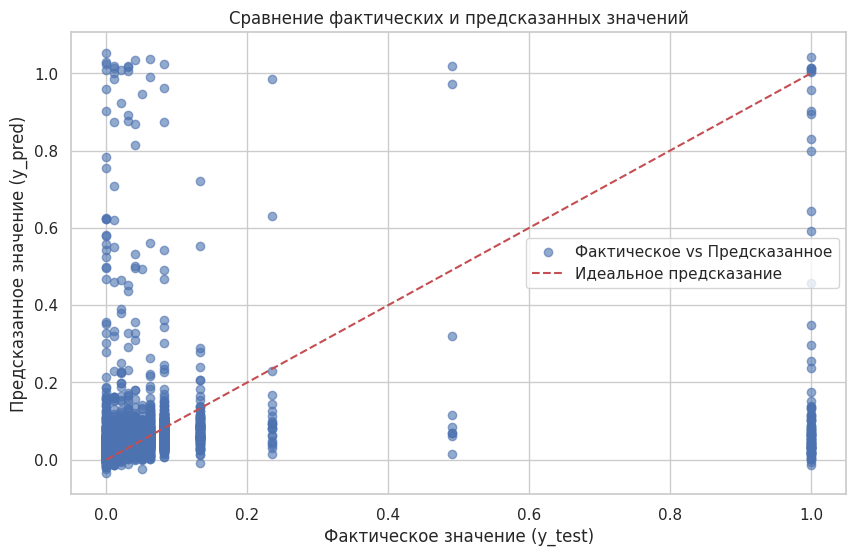

In [21]:
# Прогноз на тестовой выборке
y_pred = model(X_test_tensor).detach().squeeze().numpy()

# Построение графика план-факт
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Фактическое vs Предсказанное")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Идеальное предсказание")
plt.title("Сравнение фактических и предсказанных значений")
plt.xlabel("Фактическое значение (y_test)")
plt.ylabel("Предсказанное значение (y_pred)")
plt.legend()
plt.show()

### Сохранение модели

In [22]:
import pickle

torch.save(model.state_dict(), 'model.pth')

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

feature_columns = X_train.columns
with open('feature_columns.pkl', 'wb') as f:
    pickle.dump(feature_columns, f)

### Предсказание на новых данных

In [27]:
def predict_income(new_data):
    import pickle
    import torch

    with open('feature_columns.pkl', 'rb') as f:
        feature_columns = pickle.load(f)

    with open('scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)

    with open('income_scaler.pkl', 'rb') as f:
        income_scaler = pickle.load(f)

    numerical_cols = ['age', 'height']
    categorical_cols = ['body_type', 'drinks', 'education', 'orientation', 'sex', 'status']

    for col in categorical_cols:
        if col not in new_data:
            new_data[col] = 'missing'

    new_data = pd.get_dummies(new_data, columns=categorical_cols, drop_first=True)

    for col in feature_columns:
        if col not in new_data.columns:
            new_data[col] = 0

    new_data = new_data[feature_columns]
    new_data[numerical_cols] = scaler.transform(new_data[numerical_cols])

    new_data = new_data.astype(float)

    X_new = torch.tensor(new_data.values, dtype=torch.float32)

    input_dim = X_new.shape[1]
    model = RegressionModel(input_dim)
    model.load_state_dict(torch.load('model.pth', weights_only=False))
    model.eval()

    with torch.no_grad():
        y_pred = model(X_new).squeeze().numpy()

    income_pred = income_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

    return income_pred

#### Пример предсказания

In [32]:
new_data = pd.DataFrame({
    'age': [66, 35],
    'height': [70.5, 68.0],
    'body_type': ['athletic', 'fit'],
    'drinks': ['socially', 'rarely'],
    'education': ['graduated from college/university', 'working on masters program'],
    'orientation': ['straight', 'bisexual'],
    'sex': ['f', 'm'],
    'status': ['single', 'married']
})

predicted_income = predict_income(new_data)

n=0
for i in predicted_income:
  print(f"Предсказанный доход #{n+1}: {round(predicted_income[n])}")
  n+=1



Предсказанный доход #1: 50889
Предсказанный доход #2: 1011064


### Выводы

- Модель способна предсказывать доход пользователей на основе их характеристик.
- Точность модели нуждается в улучшении.
- Необходимо рассмотреть дополнительные признаки и методы обработки данных.

**Рекомендации:**

- Провести более глубокий анализ данных.
- Попробовать другие алгоритмы машинного обучения.
- Улучшить обработку выбросов и дисбаланса классов.